
houseprice.csv는 주택판매가격(price)과 이에 영향을 줄 것으로 판단되는 4가지 설명변수인 세금(tax; 만원), 대지평수(ground; 평), 건물평수(floor; 평), 주택연령(year; 년)을 27개 주택에 대해 조사한 것이다. 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence

data_path = "./data/"
house = pd.read_csv(data_path + "houseprice.csv")

In [4]:
# 데이타 확인
house.describe().T

,count,mean,std,min,25%,50%,75%,max
price,27.0,19.250000,7.153751,12.95,14.9750,18.450,20.375,42.450
tax,27.0,144.898815,57.640439,77.82,103.6000,121.862,166.071,308.404
ground,27.0,63.475556,24.036766,22.75,47.2165,58.500,75.631,128.000
floor,27.0,30.241481,11.165303,19.50,23.7500,29.760,33.160,68.400
year,27.0,3.648148,1.405311,0.30,3.0000,4.000,4.700,6.200


In [5]:
house.head()

,price,tax,ground,floor,year
0,12.95,98.352,34.72,19.96,4.2
1,14.75,100.416,35.31,30.00,6.2
2,13.95,90.858,22.75,23.50,4.0
3,12.95,91.146,40.50,24.64,5.4
4,14.95,101.194,44.55,22.42,4.2


In [6]:
house.shape

(27, 5)

1\.	5개 변수들에 대한 산점도 행렬을 작성하고 변수들 간의 관계를 설명하여라. 

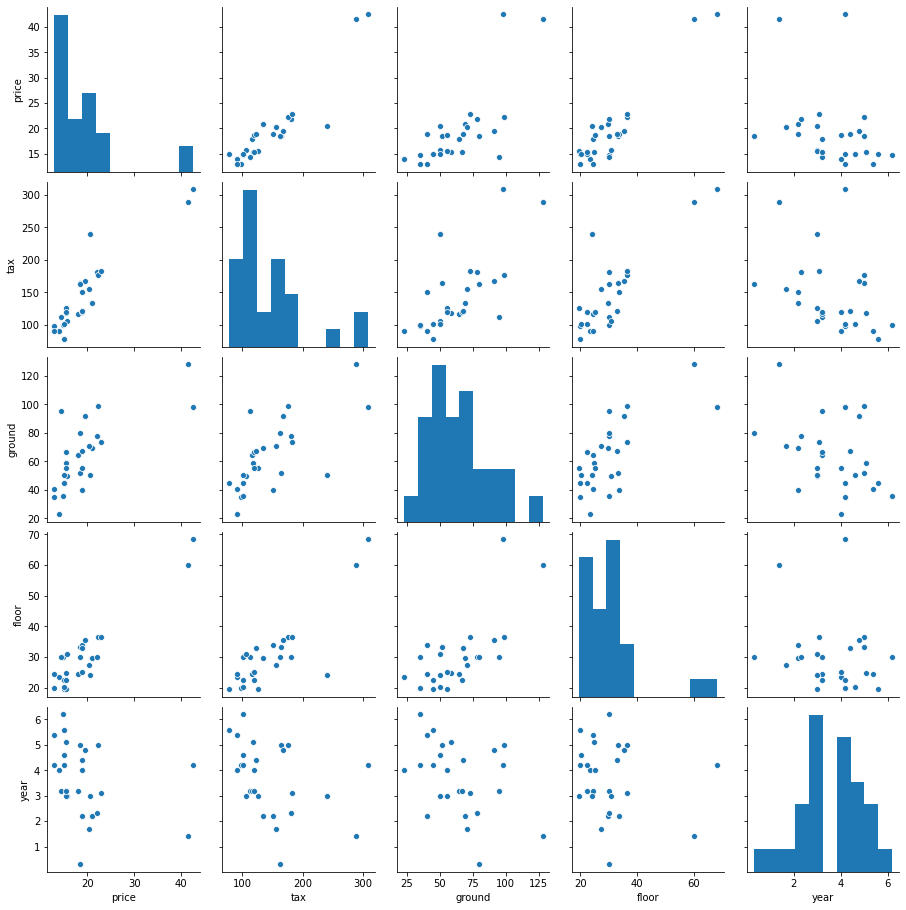

In [11]:
sns.pairplot(data=house)
plt.show()

In [12]:
house.corr()

,price,tax,ground,floor,year
price,1.000000,0.915249,0.726335,0.928827,-0.310290
tax,0.915249,1.000000,0.686850,0.832415,-0.371172
ground,0.726335,0.686850,1.000000,0.703269,-0.380275
floor,0.928827,0.832415,0.703269,1.000000,-0.178057
year,-0.310290,-0.371172,-0.380275,-0.178057,1.000000


#### 변수들 간의 관계를 설명
  - price와 tax는 0.91로 매우 강한 양의 상관 관계가 있다.
  - price와 ground 0.72로 강한 양의 상관 관계가 있다.
  - price와 floor는 0.9로 매우 강한 양의 상관 관계가 있다.
  - price와 year는 -0.31로 약한 음의 상관 관계가 있다.
  - tax와 ground는 0.68로 양의 상관 관계가 있다.
  - tax와 floor는 0.83으로 강한 양의 상관 관계가 있다.
  - tax와 year는 -0.37로 약한 음의 상관 관계가 있다.
  - ground와 floor는 0.70으로 양의 상관 관계가 있다.
  - ground와 year는 -0.38로 약한 음의 상관 관계가 있다.
  - floor와 year는 -0.17로 매우 약한 음의 상관 관계가 있다.

2\. 주택 판매가격을 종속변수로, 나머지 4개 변수를 설명변수로 하는 선형회귀모형을 적합하여라. 

In [35]:
import statsmodels.formula.api as smf

model_house = smf.ols("price ~ tax + ground + floor + year", data=house).fit()
model_house.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     74.53
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           1.82e-12
Time:                        02:39:38   Log-Likelihood:                -54.781
No. Observations:                  27   AIC:                             119.6
Df Residuals:                      22   BIC:                             126.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2187      2.047      0.595      0.558      -3.026       5.463
tax            0.0519      0.014      3.756      0.001       0.023       0.081
ground         0.0116      0.025      0.458      0.652      -0.041       0.064
floor          0.3494      0.073      4.807      0.000       0.199       0.500
year          -0.2189      0.331     -0.660      0.516      -0.906       0.469
==============================================================================
Omnibus:                        0.837   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.737
Skew:                           0.014   Prob(JB):                        0.692
Kurtosis:                       2.191   Cond. No.                         903.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 선형회귀모형을 적합
 
y_hat = 1.2187 + 0.0519 * x1 + 0.0116 * x2 + 0.3494 * x3 - 0.2189 * x4

3\.	결정계수는 얼마인가? 주택 판매가격에 유의한 영향을 주는 변수들은 무엇인가?

In [22]:
print("결정계수 = {0}".format(model_house.rsquared))

결정계수 = 0.9312715052594145


##### 주택 판매가격에 유의한 영향을 주는 변수들은 tax, floor이며 ground, year는 유의한 영향을 주지 않는다.

4\. 회귀진단을 위한 그래프들을 그리고 모형이 적절한지 판단하여라. Influential point가 있는가? 이들을 제외하면 회귀분석 결과에 영향을 줄 것으로 예상되는가? 

#### 선형회귀모형의 가정
  - y와 x는 선형관계이다.  
  - 오차항은 독립이다.  
  - 오차항 분산은 동일하다.  
  - 오차항은 정규분포를 따른다.   

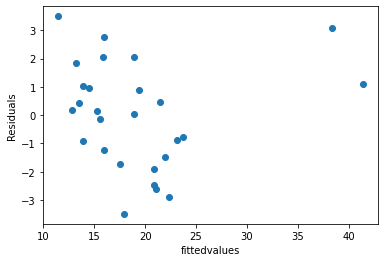

In [55]:
plt.scatter(model_house.fittedvalues, model_house.resid)
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()

### 잔차도는 선형을 갖는다. 
### 또한, Prob (F-statistic)값이 1.82e-12으로 0.05보다 작기 때문에 회귀모형에 대한 (통계적) 유의미성 검증 결과, 유의미하다할 수 있음

In [57]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model_house.resid)

1.9003462982403556

### durbin_watson 통계량 값이 2에 가깝기 때문에 오차들은 독립이라 할 수 있다.

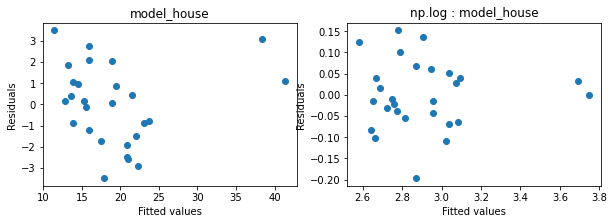

In [62]:
model_house1 = smf.ols('np.log(price)~ tax + ground + floor + year', data = house).fit()

plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.scatter(model_house.fittedvalues, model_house.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('model_house')
plt.subplot(1,2,2)
plt.scatter(model_house1.fittedvalues, model_house1.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('np.log : model_house')
plt.show()

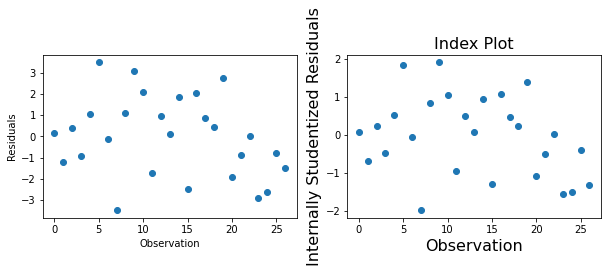

In [110]:
mh = OLSInfluence(model_house)
fig, ax = plt.subplots(1,2, figsize=(10, 3))
ax[0].scatter(house.index, mh.resid)
ax[0].set_xlabel('Observation')
ax[0].set_ylabel('Residuals')
mh.plot_index('resid',threshold=3, ax = ax[1])
plt.show()

### 잔차그래프에 깔때기 형태가 아니기 때문에 오차항 분산은 동일하다 볼 수 있다.

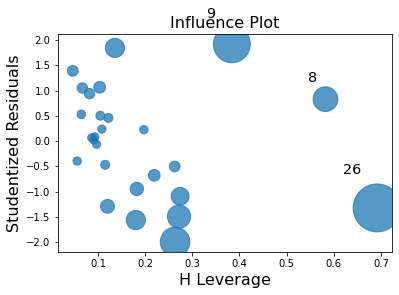

In [67]:
mh.plot_influence()
plt.show()

#### 영향점이 3개 존재하는 것으로 확인됨.

In [83]:
# 영향점 확인
house.iloc[8]

price      42.450
tax       308.404
ground     98.000
floor      68.400
year        4.200
Name: 8, dtype: float64

In [84]:
# 영향점 확인
house.iloc[9]

price      41.450
tax       289.196
ground    128.000
floor      60.000
year        1.400
Name: 9, dtype: float64

In [87]:
# 영향점 확인
house.iloc[26]

price      20.5
tax       240.0
ground     50.0
floor      24.0
year        3.0
Name: 26, dtype: float64

In [101]:
# 영향점 삭제
house_x = house.copy()
house_x = house_x.drop(index=8)
house_x = house_x.drop(index=9)
house_x = house_x.drop(index=26)
house_x.reset_index()

,index,price,tax,ground,floor,year
0,0,12.95,98.352,34.720,19.96,4.2
1,1,14.75,100.416,35.310,30.00,6.2
2,2,13.95,90.858,22.750,23.50,4.0
3,3,12.95,91.146,40.500,24.64,5.4
4,4,14.95,101.194,44.550,22.42,4.2
5,5,14.95,77.820,44.550,19.76,5.6
6,6,15.45,117.960,58.500,24.80,5.1
7,7,14.45,112.186,95.200,30.02,3.2
8,10,17.95,116.564,64.350,24.50,3.2
9,11,15.75,106.006,49.883,31.04,3.0


In [107]:
# 영향점 삭제 후 선형 회귀모형 생성
model_house1 = smf.ols("price ~ tax + ground + floor + year", data=house_x).fit()
model_house1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     17.02
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           4.40e-06
Time:                        03:41:26   Log-Likelihood:                -41.655
No. Observations:                  24   AIC:                             93.31
Df Residuals:                      19   BIC:                             99.20
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3254      2.145      2.948      0.008       1.835      10.816
tax            0.0659      0.019      3.516      0.002       0.027       0.105
ground         0.0097      0.022      0.449      0.658      -0.036       0.055
floor          0.0858      0.091      0.947      0.355      -0.104       0.275
year          -0.1114      0.268     -0.416      0.682      -0.672       0.449
==============================================================================
Omnibus:                        1.164   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                1.000
Skew:                           0.291   Prob(JB):                        0.607
Kurtosis:                       2.187   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

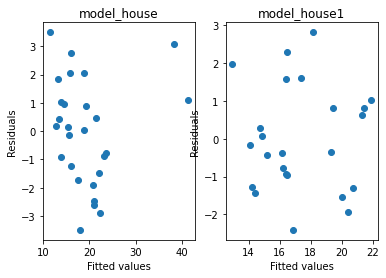

In [108]:
# 영향점 삭제 전 과 후 비교
model_house1 = smf.ols("price ~ tax + ground + floor + year", data=house_x).fit()

plt.subplot(1,2,1)
plt.scatter(model_house.fittedvalues, model_house.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('model_house')
plt.subplot(1,2,2)
plt.scatter(model_house1.fittedvalues, model_house1.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('model_house1')
plt.show()


### 영향점(Influential point)을 제거하면  회귀분석 결과에 영향을 주는 것으로 확인된다.

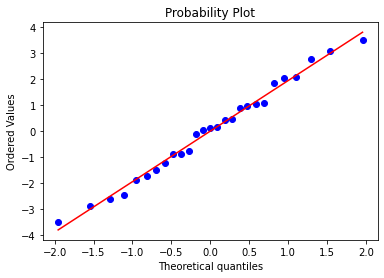

In [44]:
# 잔차의 정규분포
import scipy as sp
sp.stats.probplot(model_house.resid, plot=plt)
plt.show()

In [109]:
### VIF가 5 또는 10을 초과하면 공선성 존재한다고 경험적으로 판단
import patsy
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = patsy.dmatrices('price ~ tax + ground + floor + year', house, return_type='matrix')
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 27.20676043664783
VIF of tax : 3.9747896651562895
VIF of ground : 2.3196595146387837
VIF of floor : 4.119204698063518
VIF of year : 1.3574260489432617


### 4개의 변수 모두 다중 공성성을 보이지 않음.

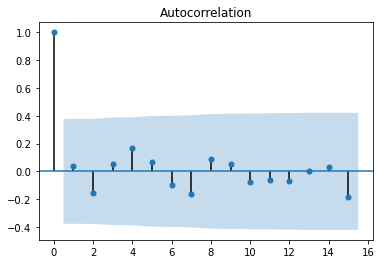

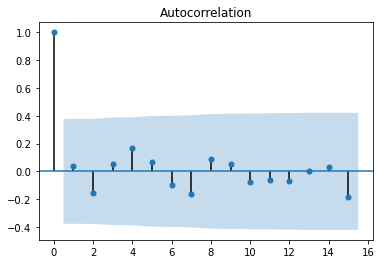

In [111]:
sm.graphics.tsa.plot_acf(model_house.resid)

### 자기상관 확인 : 자기 상관이 없다.

5\.	세금이 150만원, 대지평수가 50평, 건물평수가 30평, 주택연령이 3년인 주택의 평균판매가격에 대한 추정값과 90% 신뢰구간을 구하여라. 

In [113]:
pred = model_house.get_prediction(exog = dict(tax=150, ground=50, floor=30, year=3))
pred.summary_frame(alpha=0.1)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,19.41629,0.595931,18.392991,20.439589,15.768865,23.063714


### 세금이 150만원, 대지평수가 50평, 건물평수가 30평, 주택연령이 3년인 주택의 평균판매가격에 대한 추정값은 19.42이며, 90% 신뢰구간은 18.392991	~ 20.439589이다.